In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

ModuleNotFoundError: No module named 'sklearn.utils._show_versions'

In [3]:
import pandas as pd
import numpy as np
import os
os.chdir("D:/data/")

In [28]:
data = pd.read_csv('loan_default_dataset.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(1000, 16)
['Default', 'Checking_amount', 'Term', 'Credit_score', 'Gender', 'Marital_status', 'Car_loan', 'Personal_loan', 'Home_loan', 'Education_loan', 'Emp_status', 'Amount', 'Saving_amount', 'Emp_duration ', 'Age', 'No_of_credit_acc']


In [8]:
data.head()

,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
0,0,988,15,796,Female,Single,1,0,0,0,employed,1536,3455,12,38,1
1,0,458,15,813,Female,Single,1,0,0,0,employed,947,3600,25,36,1
2,0,158,14,756,Female,Single,0,1,0,0,employed,1678,3093,43,34,1
3,1,300,25,737,Female,Single,0,0,0,1,employed,1804,2449,0,29,1
4,1,63,24,662,Female,Single,0,0,0,1,unemployed,1184,2867,4,30,1


In [23]:
cat_vars=['Gender','Marital_status','Emp_status']

In [9]:
data['Emp_status'].unique()

array(['employed', 'unemployed'], dtype=object)

In [10]:
data['Default'].value_counts()

0    700
1    300
Name: Default, dtype: int64

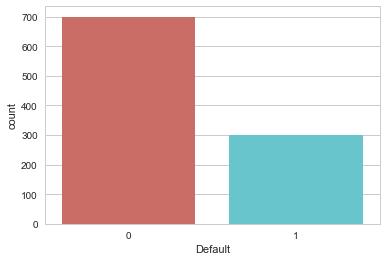

In [12]:
sns.countplot(x='Default',data=data, palette='hls')
plt.show()

In [13]:
count_no_sub = len(data[data['Default']==0])
count_sub = len(data[data['Default']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 70.0
percentage of subscription 30.0


In [14]:
data.groupby('Default').mean()

,Checking_amount,Term,Credit_score,Car_loan,Personal_loan,Home_loan,Education_loan,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
Default,,,,,,,,,,,,
0,453.052857,17.090000,783.512857,0.330000,0.544286,0.070000,0.052857,1191.744286,3290.547143,52.148571,32.988571,2.595714
1,150.913333,19.506667,706.720000,0.406667,0.310000,0.023333,0.250000,1281.533333,2919.610000,42.950000,27.056667,2.430000


In [15]:
data.groupby('Gender').mean()

,Default,Checking_amount,Term,Credit_score,Car_loan,Personal_loan,Home_loan,Education_loan,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
Gender,,,,,,,,,,,,,
Female,0.351613,354.103226,17.770968,753.558065,0.325806,0.506452,0.035484,0.129032,1229.758065,3132.793548,38.845161,30.990323,2.300000
Male,0.276812,366.143478,17.834783,763.582609,0.365217,0.459420,0.065217,0.104348,1213.704348,3200.144928,54.126087,31.307246,2.656522


Text(0,0.5,'Default')

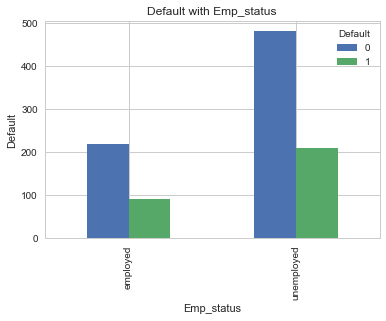

In [16]:
%matplotlib inline
pd.crosstab(data.Emp_status,data.Default).plot(kind='bar')
plt.title('Default with Emp_status')
plt.xlabel('Emp_status')
plt.ylabel('Default')

In [34]:
cat_vars=['Gender','Marital_status','Emp_status']
for var in cat_vars:
    #cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1


In [35]:
data.head()

,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,...,Saving_amount,Emp_duration,Age,No_of_credit_acc,Gender_Female,Gender_Male,Marital_status_Married,Marital_status_Single,Emp_status_employed,Emp_status_unemployed
0,0,988,15,796,Female,Single,1,0,0,0,...,3455,12,38,1,1,0,0,1,1,0
1,0,458,15,813,Female,Single,1,0,0,0,...,3600,25,36,1,1,0,0,1,1,0
2,0,158,14,756,Female,Single,0,1,0,0,...,3093,43,34,1,1,0,0,1,1,0
3,1,300,25,737,Female,Single,0,0,0,1,...,2449,0,29,1,1,0,0,1,1,0
4,1,63,24,662,Female,Single,0,0,0,1,...,2867,4,30,1,1,0,0,1,0,1


In [11]:
data.head()

,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,...,Saving_amount,Emp_duration,Age,No_of_credit_acc,Gender_Female,Gender_Male,Marital_status_Married,Marital_status_Single,Emp_status_employed,Emp_status_unemployed
0,0,988,15,796,Female,Single,1,0,0,0,...,3455,12,38,1,1,0,0,1,1,0
1,0,458,15,813,Female,Single,1,0,0,0,...,3600,25,36,1,1,0,0,1,1,0
2,0,158,14,756,Female,Single,0,1,0,0,...,3093,43,34,1,1,0,0,1,1,0
3,1,300,25,737,Female,Single,0,0,0,1,...,2449,0,29,1,1,0,0,1,1,0
4,1,63,24,662,Female,Single,0,0,0,1,...,2867,4,30,1,1,0,0,1,0,1


In [8]:
var="Gender"
dat1=pd.get_dummies(data[var],prefix=var)
dat1.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [42]:
cat_vars=['Gender','Marital_status','Emp_status']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [43]:
to_keep

['Default',
 'Checking_amount',
 'Term',
 'Credit_score',
 'Car_loan',
 'Personal_loan',
 'Home_loan',
 'Education_loan',
 'Amount',
 'Saving_amount',
 'Emp_duration ',
 'Age',
 'No_of_credit_acc',
 'Gender_Female',
 'Gender_Male',
 'Marital_status_Married',
 'Marital_status_Single',
 'Emp_status_employed',
 'Emp_status_unemployed']

In [36]:
data_vars=data.columns.values.tolist()

In [40]:
type(data.columns.values)

numpy.ndarray

In [5]:
np.setseed(12345)

AttributeError: module 'numpy' has no attribute 'setseed'

In [3]:
import numpy as np

In [28]:
data_final=data[to_keep]
data_final.columns.values

array(['Default', 'Checking_amount', 'Term', 'Credit_score', 'Car_loan',
       'Personal_loan', 'Home_loan', 'Education_loan', 'Amount',
       'Saving_amount', 'Emp_duration ', 'Age', 'No_of_credit_acc',
       'Gender_Female', 'Gender_Male', 'Marital_status_Married',
       'Marital_status_Single', 'Emp_status_employed',
       'Emp_status_unemployed'], dtype=object)

In [29]:
data_final_vars=data_final.columns.values.tolist()
y=['Default']
X=[i for i in data_final_vars if i not in y]

In [30]:
X = data_final.loc[:, data_final.columns != 'Default']
y = data_final.loc[:, data_final.columns == 'Default']

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
logreg.des

In [36]:
y_pred = logreg.predict(X_test)

In [37]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [38]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.900


D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-pac

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[210  10]
 [ 12  68]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.95      0.95       220
          1       0.87      0.85      0.86        80

avg / total       0.93      0.93      0.93       300



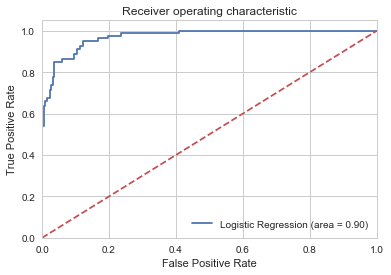

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [44]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Default'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Default']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Default']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Default']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Default']==1])/len(os_data_X))

ModuleNotFoundError: No module named 'imblearn'